### 실데이터 분석
- 외부에서 가져온 데이터를 분석해보자.
  - 시나리오 및 가설을 설정하고 우리가 설정한 가설이 맞을지 데이터 분석을 통해 확인
  - 분석 결과를 종합해 insight 도출
- 분석 결과를 기반으로 페르소나, 고객 여정맵을 만들어서 이를 바탕으로 SW 솔루션 도출
  - 페르소나 : 우리의 서비스를 사용할 가상의 고객
  - 고객 여정 맵: 개인의 생각, 행동, 감정, 풀편사항 등을 시간 순서나 경혐 단계별로 정리

### 선생님과 함께 개발자 데이터를 가지고 실습을 한 이후에 예시 데이터를 가지고 팀별로 같은 과정을 한번 더 거쳐볼 예정

In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기.

In [2]:
# 외부 데이터 불러와서 DF 저장 → read_csv 사용
data = pd.read_csv("./data/Developer_Salary.csv", encoding = "utf8", index_col = "일련번호")
data
# data/Developer_Salary.csv
# encoding = 'utf8', 'euc-kr', 'cp949' (한글 파일 인코딩하는 대표적인 방식 3가지)
# : 컴퓨터가 글자를 해석하는 방식
# index_col = '일련번호'

,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수
일련번호,,,,,,,,,,
DEV1,<35,Master,Man,No,Dev,15,6,Germany,77290.0,7.0
DEV2,<35,Undergraduate,Man,No,Dev,9,6,Canada,NaN,13.0
DEV3,>35,Master,Man,No,Dev,26,18,Germany,77831.0,NaN
DEV4,>35,Undergraduate,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,1000000.0,3.0
DEV5,<35,Master,Man,No,Dev,19,10,Germany,60535.0,99.0
...,...,...,...,...,...,...,...,...,...,...
DEV33462,<35,Master,Man,Yes,Dev,7,5,United States of America,94000.0,5.0
DEV33463,<35,Undergraduate,Man,No,Dev,7,2,Germany,41058.0,13.0
DEV33464,>35,Undergraduate,Man,No,Dev,21,16,United States of America,115000.0,11.0


In [3]:
# 데이터 프레임의 인덱스 지정
# data = data.set_index('일련번호') # 원본 데이터 변경 안 함. inplace = True 설정, 덮어쓰는 과정이 필요

### 데이터 확인
- 외부에서 데이터를 가져오면 데이터를 확인하는 단계를 거쳐야함.

In [4]:
# 1. 데이터를 샘플링(전체 데이터에서 일부만 가져와보기.)
# 1) head(샘플링할 데이터의 수) : 머리, 앞에서부터 차례로 데이터를 샘플링
data.head(3)

# 2) tail(샘플링할 데이터의 수) : 꼬리, 뒤에서부터 차례로 데이터를 샘플링
data.tail(8)
# 샘플링할 데이터의 수를 주어주지 않으면 5개를 샘플링(기본값)

,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수
일련번호,,,,,,,,,,
DEV33459,<35,Other,Man,No,Dev,9,7,United States of America,120000.0,11.0
DEV33460,<35,Undergraduate,Woman,No,Dev,13,9,Canada,60906.0,11.0
DEV33461,<35,Undergraduate,Man,Yes,Dev,9,5,United States of America,115000.0,19.0
DEV33462,<35,Master,Man,Yes,Dev,7,5,United States of America,94000.0,5.0
DEV33463,<35,Undergraduate,Man,No,Dev,7,2,Germany,41058.0,13.0
DEV33464,>35,Undergraduate,Man,No,Dev,21,16,United States of America,115000.0,11.0
DEV33465,<35,Undergraduate,Man,Yes,Dev,5,1,United States of America,70000.0,15.0
DEV33466,<35,Master,NonBinary,No,Dev,10,3,United Kingdom of Great Britain and Northern I...,75384.0,2.0


### 데이터 컬럼 설명


 
- 일련번호
- 나이 (<35, >35) : 35세 미만 or 35세 이상
- 학력 (Undergraduate : 학사, Master : 석사, phD : 박사, NoHigherEd : 고등학교 졸업, Other : 그 외)
- 성별 (Man, Woman, NonBinary) : 남자, 여자, 제 3의 성
- 정신건강 (Yes : 건강, No : 병력있음)
- 전문직 : 전문개발자가 맞는지 (삭제예정)
- 개발공부기간 : 코딩을 공부한 기간(수치형)
- 연차 : 개발자로써 일을 한 기간(수치형)
- 국적 : 독일, 캐나다, 영국, 미국, 인도, 일본, 한국
- 연봉 : 1년간 받는 급여(달러)
- 보유기술개수 : 해당 사람이 다룰 수 있는 기술의 개수(수치형)

In [5]:
# DF의 정보를 확인하는 함수 : info()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33466 entries, DEV1 to DEV33466
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   나이      33466 non-null  object 
 1   학력      33466 non-null  object 
 2   성별      33466 non-null  object 
 3   정신건강    33466 non-null  object 
 4   전문직     33466 non-null  object 
 5   개발공부기간  33466 non-null  int64  
 6   연차      33466 non-null  int64  
 7   국적      33466 non-null  object 
 8   연봉      33462 non-null  float64
 9   보유기술개수  33462 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 2.8+ MB


In [6]:
# 결측치 유무 확인하는 방법
data.isnull() # 각 데이터가 null(결측치)인지 확인해주는 함수
# Boolean 값 : True(1), False(0)
data.isnull().sum() # 각 컬럼별로 몇 개의 결측치가 있는지 확인
# 결측치의 존재를 확인했으니 이따가 결측치를 처리해줄 예정

나이        0
학력        0
성별        0
정신건강      0
전문직       0
개발공부기간    0
연차        0
국적        0
연봉        4
보유기술개수    4
dtype: int64

In [7]:
# 기술통계 확인
data.describe() # 수치형(숫자) 자료만 가능
# count : 데이터 개수
# mean : 평균
# std : 표준편차
# min : 최소값, max : 최대값
# 25%, 50% 75% : 사분위수
# 50% -> 중앙값 : 데이터의 중앙에 위치한 값

,개발공부기간,연차,연봉,보유기술개수
count,33466.000000,33466.000000,3.346200e+04,33462.000000
mean,15.160103,9.765523,8.916111e+04,13.240840
std,10.092218,8.609730,5.499951e+04,6.912986
min,0.000000,0.000000,1.000000e+00,0.000000
25%,8.000000,4.000000,5.000000e+04,8.000000
50%,12.000000,7.000000,8.292100e+04,12.000000
75%,20.000000,14.000000,1.256390e+05,17.000000
max,50.000000,50.000000,2.000000e+06,120.000000


In [8]:
# 문자열 데이터 통계 확인
data.describe(include = 'object')
# unique : 고유한 개수
# top : 최빈값(가장 많이 등장하는 값)
# freq : 최빈값이 등장한 횟수

,나이,학력,성별,정신건강,전문직,국적
count,33466,33466,33466,33466,33466,33466
unique,2,5,3,2,2,7
top,<35,Undergraduate,Man,No,Dev,United States of America
freq,20746,19232,30848,24532,30588,14696


In [9]:
# 외부에서 데이터를 가지고 오면
# 1. head, tail 데이터 샘플링
# 2. info 함수로 데이터 정보 -> 각 컬럼이 어떤 의미를 가지고 있는지 확인
# 3. 기술통계 확인(수치형, 범주형)
# 4. 결측치 확인
# 5. 이상치 확인

### 이상치 확인
- 이상치(Abnormal) : 다른 자료와 극단적으로 다른 값, 즉 유달리 높거나 낮은 값

#### 이상치 탐색 방법
1. (간단하게 확인하는 방법) 평균과 중앙값을 비교
  - 평균 : 모든 값을 더해서 전체 개수로 나눔 → 이상치에 영향을 많이 받음
    - 예시) 고3 조은유 매달 모의고사 응시, 평균 점수 90점 이상을 받는 우수한 학생
      10월달에 배탈이 나서 모의고사를 엄청 못봄
      1~11월 모의고사 전체 평균을 내면 90점보다 엄청 낮게 나옴 (10월달 모의고사가 영향을 줌.)
  - 중앙값 : 전체 데이터를 크기 순서대로 나열한 후 중간에 있는 값을 가져온 것.
    이상치의 값을 적게 받음 -> 이상치는 크기 순서대로 나열하면 양 끝에 위치하기 때문에 중앙값 결정에 영향을 안 줌

  => 평균과 중앙값을 비교했을때 차이가 많이 나면 이상치가 있다고 간주

In [10]:
# 평균과 중앙값 비교
# 봉, 보유기술개수 이상치 존재
data.describe()[['연봉', '보유기술개수']]
# 간단하게 확인하는 방법이기 때문에 이걸로 완전히 결정을 내리면 안 됨.

,연봉,보유기술개수
count,3.346200e+04,33462.000000
mean,8.916111e+04,13.240840
std,5.499951e+04,6.912986
min,1.000000e+00,0.000000
25%,5.000000e+04,8.000000
50%,8.292100e+04,12.000000
75%,1.256390e+05,17.000000
max,2.000000e+06,120.000000


2. 이상치 시각화
   - IQR(Interquatile Range) 방법 : 이상치를 탐지하기 위한 통계적 방법
   - 사분위수(Quartile) : 데이터를 순서대로 나열한 후, 구간별(25%, 50%, 75%)로 위치한 수를 뽑은 것
   - IQR = Q3 - Q1 : 데이터 50%가 중앙값으로부터 분포하고 있는 범위
   - IQR을 기준으로 너무 많이 벗어나 있는 값은 이상치로 판단
   - IQR * 1.5
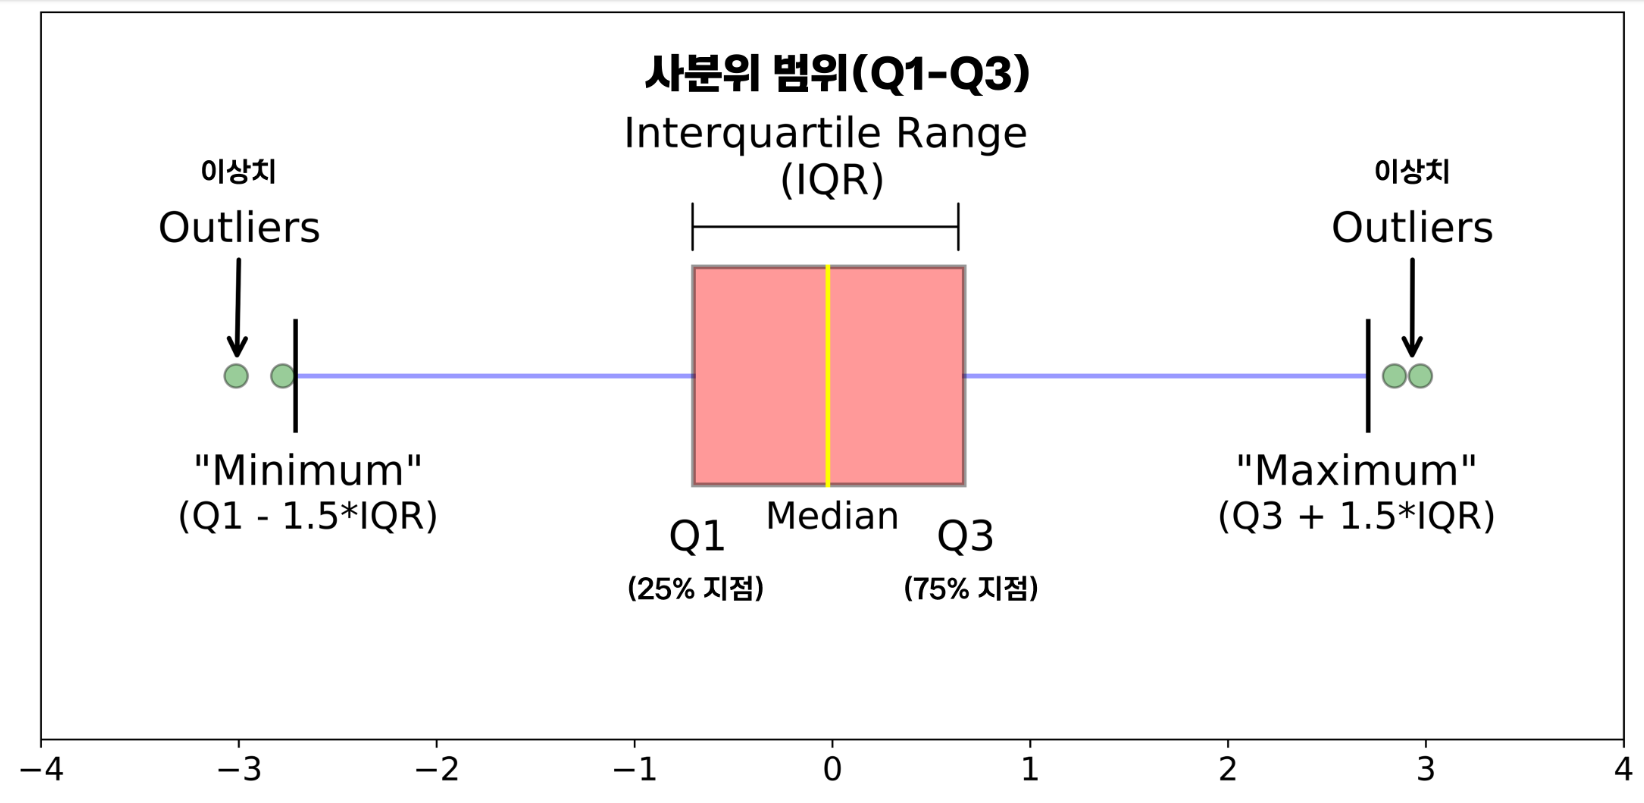

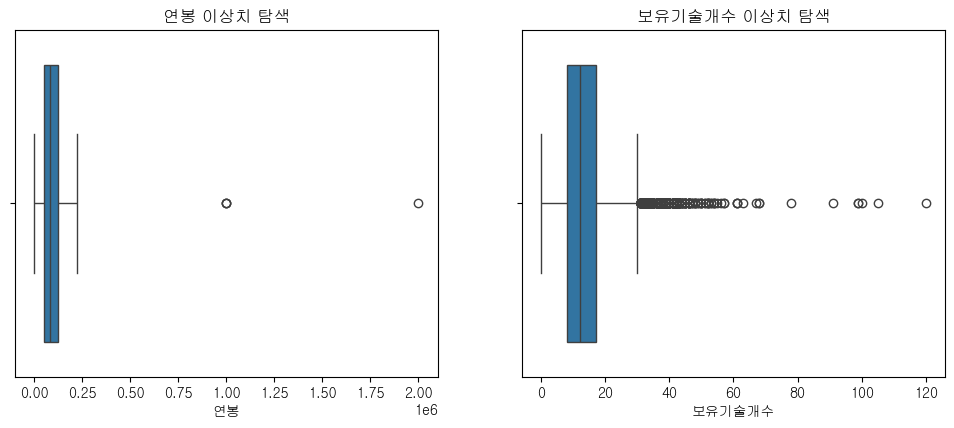

In [11]:
# 1. 연봉 데이터 박스 플랏 그리기 -> seaborn 라이브러리 사용
# 
plt.figure(figsize = (12, 4.5))
plt.rcParams['font.family'] = 'Gulim'

plt.subplot(1, 2, 1)
sns.boxplot(x = data['연봉'])
plt.title('연봉 이상치 탐색')

# 보유기술개수 박스플랏 그리기
plt.subplot(1, 2, 2)
sns.boxplot(x = data['보유기술개수'])
plt.title('보유기술개수 이상치 탐색')

plt.show()

# 연봉 : IQR 범위 이외의 값은 이상치로 처리
# 보유기술 개수 : 30~75의 값은 이상치로 나오지만 데이터의 분포가 밀집돼있는 구간 -> 이상치가 아니라고 판단
# 75 이상인 값만 이상치로 처리

In [12]:
# 결측치 처리
# 1. 삭제 : 데이터가 너무 많을 경우에만 삭제
# 2. 대체(다른 값으로 채움) : 대표값(평균, 중앙값, 최빈값)으로 채움
data.isnull().sum()

나이        0
학력        0
성별        0
정신건강      0
전문직       0
개발공부기간    0
연차        0
국적        0
연봉        4
보유기술개수    4
dtype: int64

In [13]:
# 연봉 데이터 결측치 처리
mid_salary = data['연봉'].median()

data['연봉'] = data['연봉'].fillna(mid_salary)
data['연봉'].isnull().sum()

np.int64(0)

In [14]:
# 보유기술개수 결측치
# 1. 보유기술개수 중앙값 구해서 mid_skill 변수에 저장
mid_skill = data['보유기술개수'].median()

# 2. fillna 사용해서 보유기술개수 컬럼 결측치를 mid_skill로 대체
# 3. 2번 결과로 data['보유기술개수'] 덮어씌우기
data['보유기술개수'] = data['보유기술개수'].fillna(mid_skill)

# 4. data['보유기술개수'].isnull().sum() 결과 0인거 확인하기.
data['보유기술개수'].isnull().sum()

np.int64(0)

In [15]:
# 이상치 처리
# 보유기술 게수 이상치 처리
# 75개 이상의 데이터는 이상치
data.loc[data['보유기술개수'] >= 75, '보유기술개수'] = np.nan
# 보유기술개수가 75개 이상인 데이터의 보유기술개수에 Nan 값 넣어주기
# fillna로 중앙값 대체
# 1. 결측치와 이상치를 한번에 대체 가능
# 2. isnull().sum()을 통해 잘 대체됐는지 확인을 쉽게 가능
# 머신러닝, 딥러닝할 때 연결이 자연스러움
print(data['보유기술개수'].isnull().sum())
data['보유기술개수'] = data['보유기술개수'].fillna(mid_skill)
print(data['보유기술개수'].isnull().sum())

7
0


In [16]:
# 연봉 데이터 이상치 처리
# IQR 범위를 기준으로 이상치를 골라낼 수 있음.

# 사분위수 계산(Q3 - Q1)
Q1_salary = data['연봉'].quantile(0.25)
Q3_salary = data['연봉'].quantile(0.75)

# IQR 계산
IQR_salary = Q3_salary - Q1_salary
# 데이터가 존재할 수 있는 정상 범위를 구해보자
lower_salary = Q1_salary - 1.5 * IQR_salary
upper_salary = Q3_salary + 1.5 * IQR_salary

# Lower ~ upper 구간 밖에 있는 이상치를 필터링
# 1.
data.loc[(lower_salary > data['연봉']) | (upper_salary < data['연봉']), '연봉'] = np.nan
print(data['연봉'].isnull().sum())

4


In [17]:
# data['연봉'] nan 채우기. -> mid_salary(중앙값)
data['연봉'] = data['연봉'].fillna(mid_salary)
print(data['연봉'].isnull().sum())

0


### 데이터 연산
- 연봉데이터 : 달러로 돼있음 -> 원화로 변경
- 연봉(12개월) -> 월급으로 바꿔보자.

In [18]:
# 1. 원화로 변경, 오늘 환율(1,389.70)
# 2. int형 형변
# 연봉데이터 컬럼에 덮어씌워서 저장
data['연봉'] = (data['연봉'] * 1389.7).astype('int')
data['연봉']

일련번호
DEV1        107409913
DEV2        115235313
DEV3        108161740
DEV4        115235313
DEV5         84125489
              ...    
DEV33462    130631800
DEV33463     57058302
DEV33464    159815500
DEV33465     97279000
DEV33466    104761144
Name: 연봉, Length: 33466, dtype: int64

In [19]:
# 2. 연봉을 월급으로 환산해서 월급이라는 새로운 컬럼에 저장
# int형으로 형 변환해서 저장
data['월급'] = data['연봉'] // 12
data['월급']

일련번호
DEV1         8950826
DEV2         9602942
DEV3         9013478
DEV4         9602942
DEV5         7010457
              ...   
DEV33462    10885983
DEV33463     4754858
DEV33464    13317958
DEV33465     8106583
DEV33466     8730095
Name: 월급, Length: 33466, dtype: int64

### 데이터 통계치 확인.
1. 개발자 전체 평균 월급 계산
2. 국적별 평균 월급 계산
3. 성별 평균 월급 계산

In [20]:
# 1. 개발자 전체 평균 월급 계산
data['월급'].mean()

np.float64(10309358.626606109)

In [21]:
# 2. 국적별 평균 월급 계산
data['국적'].unique()

# 우리나라 국적 개발자 평균 월급
# 1) 국적이 Soiuth Korea인 데이터 필터링
# 2) 우리나라 국적 개발자 평균 월급 계산
data.loc[data['국적'] == "South Korea", "월급"].mean()

np.float64(5498138.493055556)

In [22]:
# groupby -> 분류별 통계치를 구해주는 기능
country_pay = data[['국적', '월급']]

# groupby한 결과는 통계치를 구해야만 해석 가능.
# by = 그룹을 지을 컬럼
country_pay_mean = country_pay.groupby(by = '국적').mean().astype('int')
country_pay_mean

,월급
국적,
Canada,10001267
Germany,8091780
India,2804570
Japan,7557499
South Korea,5498138
United Kingdom of Great Britain and Northern Ireland,9395766
United States of America,14333117


In [23]:
# 3. 성별 평균 월급 계산
# 1) 성별, 월급 인덱싱 -> gender_pay
gender_pay = data[['성별', '월급']]

# 2) groupby 활용해서 성별 평균 월급 계산 -> gender_pay_mean
# 2-1) int 형변환
gender_pay_mean = gender_pay.groupby(by = '성별').mean().astype('int')

# 3) 출력
gender_pay_mean

,월급
성별,
Man,10324093
NonBinary,10649789
Woman,9930122


<Axes: ylabel='국적'>

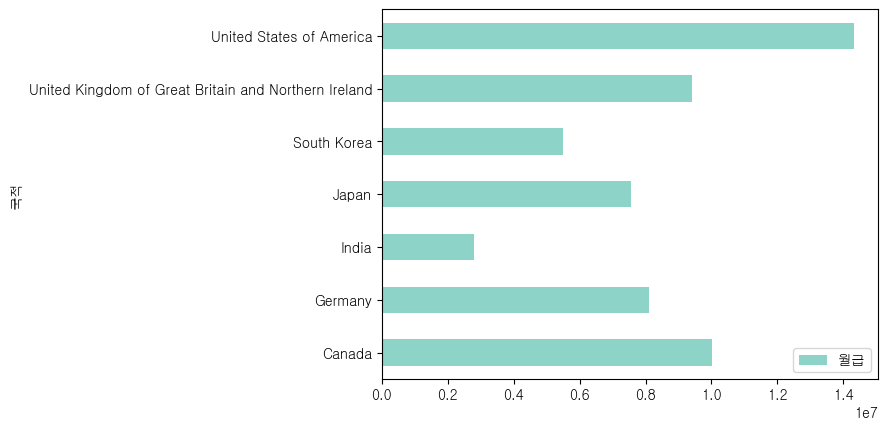

In [24]:
# 시각화 진행.
# 1. 국적별 평균 월급 시각화
# kind : 그래프 종류
# barh : 수평으로 그려진 대 그래프, 값들의 크기 차이를 보기에 용이
country_pay_mean.plot(kind = 'barh', colormap = 'Set3')

<Axes: xlabel='성별'>

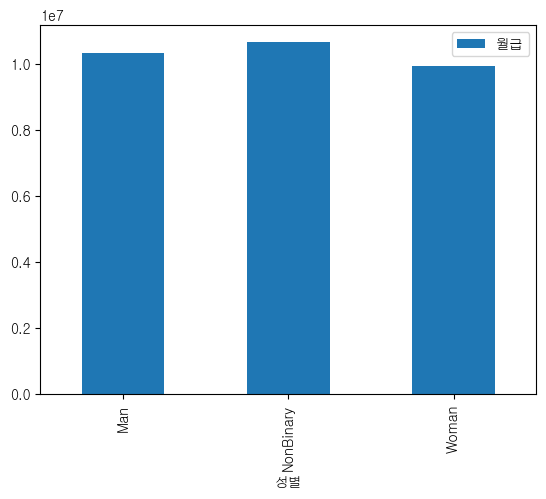

In [25]:
# 2. 성별 평균 월급 그래프 그리기 -> plot
# kind = 'bar'
gender_pay_mean.plot(kind = 'bar')

### 1. 시나리오 (문제 배경 및 분석 목적)
>부트캠프를 통해 개발자로의 진입을 준비하거나, 이미 취업에 성공한 신입 개발자들은
입사 초기부터 급여 수준, 커리어 성장 가능성, 기술 적합성 등의 현실적인 문제에 직면하게 된다.
특히 연봉에 대한 불만족은 이직 또는 번아웃의 주요 원인이 되며,
이는 커리어 초기에 올바른 방향 설정이 얼마나 중요한지를 보여준다.
이에 따라, 현업 개발자들의 데이터를 분석함으로써
연봉 상승에 실질적인 영향을 미치는 요인들을 식별하고,
부트캠프 수강생과 신입 개발자 모두에게 적용 가능한 데이터 기반 경력 성장 전략을 제시하고자 한다.

### 2.가설설정
>1. 학력이 높아질 수록 더 많은 급여를 받을 것이다.
>2. 다룰 수 있는 기술이 늘어날수록 더 많은 급여를 받을 것이다. 
>3. 연봉을 많이 받을 수 있는 특정 기술 스택이 존재할 것이다.

### 첫 번째 가설 검증
>학력이 높아질 수록 더 많은 급여를 받을 것이다.

In [26]:
# 학력별 평균 월급 비교 => groupby
# PhD : 박사, Master : 석사, Undergraduate : 학사, NoHigherEd : 고졸, Other : 해외교육, 검정고시, 비정규교육, 중졸 등
data['학력'].unique()

grade_pay = data[['학력', '월급']]
grade_pay_mean = grade_pay.groupby(by = '학력').mean().astype(int)
grade_pay_mean

,월급
학력,
Master,10689581
NoHigherEd,8529295
Other,10470344
PhD,12187352
Undergraduate,10121577


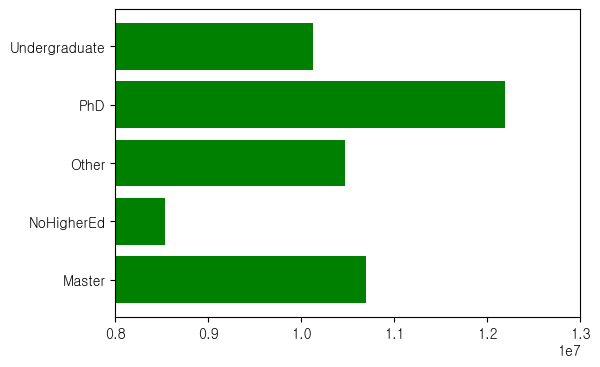

In [27]:
# pyplou 활용해서 그래프 그리기

plt.figure(figsize = (6, 4))

plt.barh(y = grade_pay_mean.index, width = grade_pay_mean['월급'], color = 'green')

# 값의 차이를 극대화시켜서 보기위해 x값의 범위를 조정
plt.xlim(8000000, 13000000)
plt.show()

### 국적 - 학력 같이 그룹을 지어서 평균 구해보기
- 모든 국적별로 해당 현상이 일어나는지 확인.

In [28]:
# 1. groupby
# 국적, 학력, 월급 데이터 인덱싱
target_data = data[['국적', '학력', '월급']]
target_data_mean = target_data.groupby(by = ['국적', '학력']).mean().astype(int)
# 국적, 학력 DF 인덱스로 사용 -> 멀티 인덱스

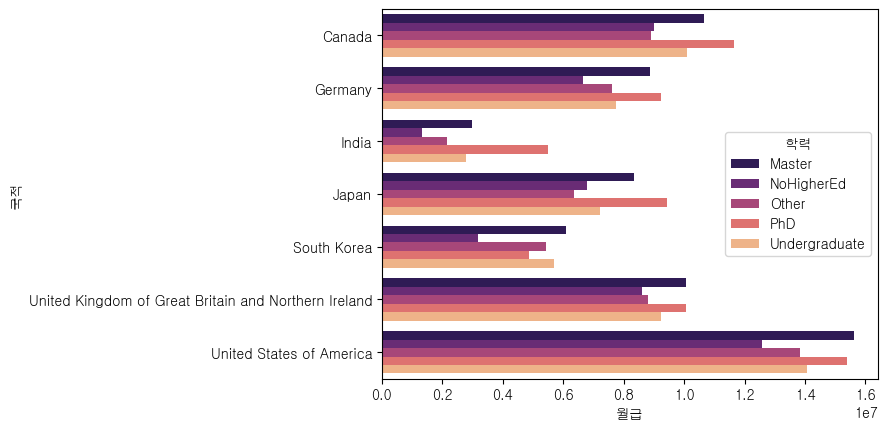

In [29]:
# seaborn 라이브러리 활용
sns.barplot(data = target_data_mean, x = '월급', y = '국적', hue = '학력', palette = 'magma')
plt.show()

C:\Users\notye\AppData\Local\Temp\ipykernel_9044\3181339248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['학력'] = pd.Categorical(target_data['학력'], categories = ["PhD", "Master", "Undergraduate", "NoHigherEd", "Other"])
C:\Users\notye\AppData\Local\Temp\ipykernel_9044\3181339248.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_data_median = target_data.groupby(by = ['국적', '학력']).median().astype(int)


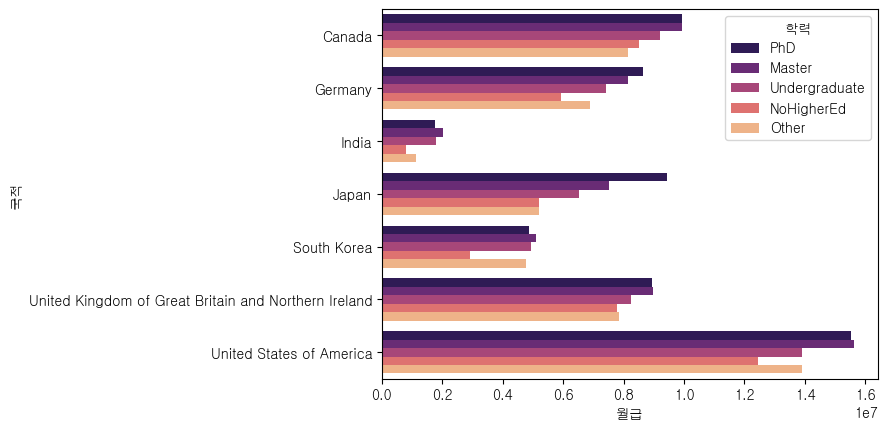

In [30]:
target_data = data[['국적', '학력', '월급']]
target_data['학력'] = pd.Categorical(target_data['학력'], categories = ["PhD", "Master", "Undergraduate", "NoHigherEd", "Other"])
target_data_median = target_data.groupby(by = ['국적', '학력']).median().astype(int)
sns.barplot(data = target_data_median, x = '월급', y = '국적', hue = '학력', palette = 'magma')
plt.show()

In [31]:
# 2. pivot_table : 테이블 형태로 집계(엑셀 피벗처럼)
# 차이점 : fill_value(Nan 값 대체할 값) 다양한 옵션 제공
target_pivot = pd.pivot_table(data, index = ['국적', '학력'], values = '월급', aggfunc = 'median').astype(int)
target_pivot

월급
국적                                                 학력                     
Canada                                             Master          9947125
                                                   NoHigherEd      8495988
                                                   Other           8138546
                                                   PhD             9941160
                                                   Undergraduate   9196687
Germany                                            Master          8151169
                                                   NoHigherEd      5928460
                                                   Other           6885268
                                                   PhD             8641559
                                                   Undergraduate   7409880
India                                              Master          2015007
                                                   NoHigherEd       791954
                                                   Other           1128725
                                                   PhD             1746852
                                                   Undergraduate   1778584
Japan                                              Master          7499747
                                                   NoHigherEd      5207321
                                                   Other           5207321
                                                   PhD             9445037
                                                   Undergraduate   6519082
South Korea                                        Master          5114096
                                                   NoHigherEd      2928444
                                                   Other           4757463
                                                   PhD             4854569
                                                   Undergraduate   4948142
United Kingdom of Great Britain and Northern Ir... Master          8981631
                                                   NoHigherEd      7784057
                                                   Other           7857016
                                                   PhD             8928590
                                                   Undergraduate   8233161
United States of America                           Master         15634125
                                                   NoHigherEd     12449395
                                                   Other          13897000
                                                   PhD            15518316
                                                   Undergraduate  13897000

In [32]:
# index 중에서 South Korea인 부분만 가져오기.
target_graph = target_pivot.loc['South Korea']
# NoHigherEd, Undergraduate, Master, PhD, Other
target_graph = target_graph.loc[["NoHigherEd", "Undergraduate", "Master", "PhD", "Other"]]

<Axes: ylabel='학력'>

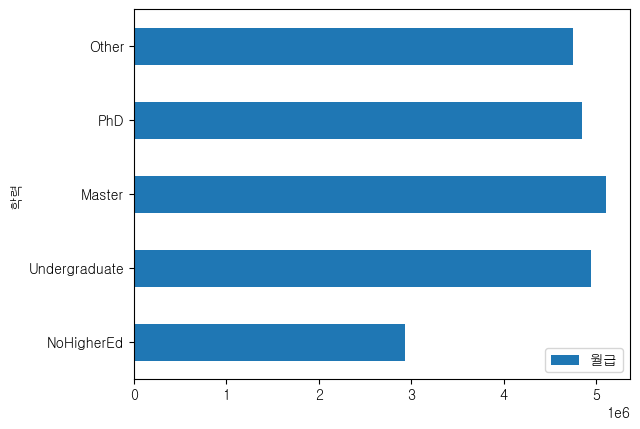

In [33]:
target_graph.plot(kind = 'barh')

### 학력 분석 결과
- NoHigherEd(고등학교 졸업)의 학력을 가진 개발자의 연봉이 굉장히 낮게 책정이 돼 있음을 확인
- Undergraduate(학사) 이상의 학력(석사, 박사, 그외 학력)은 비교적 큰 차이가 없다.
- 고졸 학력을 가지고 있는 개발자라면 시간을 투자해서 학위를 취득하는 것이 연봉 상승에 좋은 영향을 줄 것
- 학사 이상의 학력을 가지고 있는 개발자라면 무리해서 학위를 취득하는 것보다 다른 역량을 강화하는 것이 좋을 것 같다.

### 두 번째 가설 검증
>다룰 수 있는 기술이 늘어날 수록 더 많은 급여를 받을 것이다.

In [34]:
# 다룰 수 있는 기술의 수 -> 보유기술개수
# 보유기술개수 - 월급 사이에 선형관계 있는지 확인
# 선형관계 : 서로 다른 특성 간에 비례 혹은 반비례하는 성질을 띄고 있는지 확인하는 개념
# 공부시간 - 시험점수 -> 공부시간 증가 => 시험점수고 증가 : 두 특성간에 선형 관계가 존재

<Axes: xlabel='월급', ylabel='연봉'>

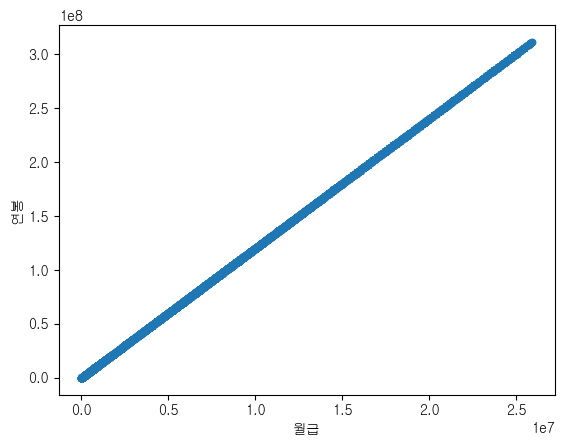

In [35]:
# 선형관계가 있는 두 특성(월급, 연봉)을 산접도로 그려보기.
data.plot(kind = 'scatter', x = '월급', y = '연봉')
# 산점도의 모습이 선에 가까울 수록 두 특성 간에 선형관계가 있다

<Axes: xlabel='보유기술개수', ylabel='월급'>

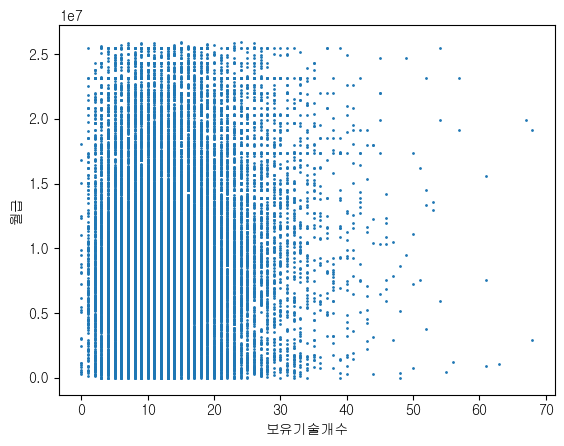

In [36]:
# 1. 산점도 -> 데이터의 분포를 살펴봄.
data.plot(kind = 'scatter', x = '보유기술개수', y = '월급', s = 1) # s = 1 : 점 크기

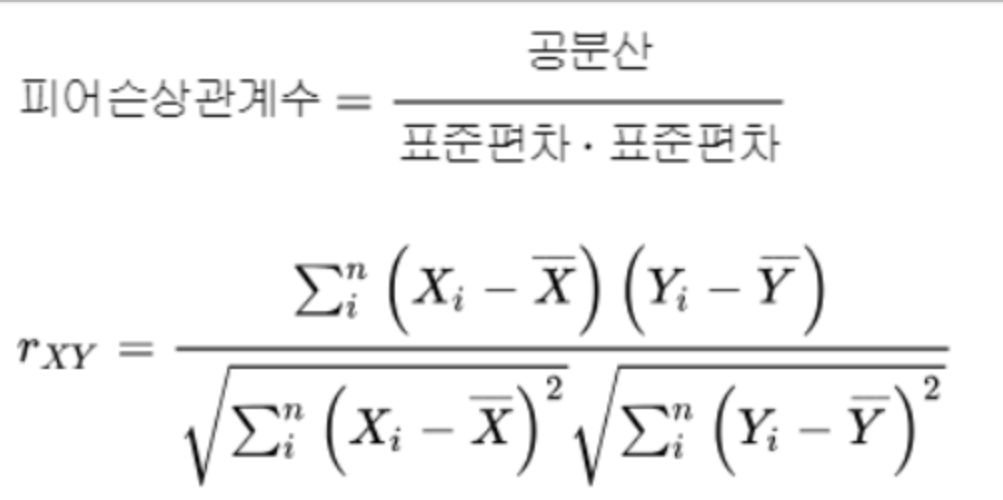
>- 표준편차 : 데이터의 분산정도를 나타낸 값
>- 공분산 : 두 특성간의 선형관계를 수치화 하여 나타낸 값
>- 성적과 공부시간이 비례하다면 양의 공분산을 가짐
>- 성적과 게임시간이 반비례하다면 음의 공분산을 가짐
>- 성적과 머리카락 길이간의 연관성이 없다면 0에 가까운 공분산을 가짐
>- 상관계수 : 공분산 값을 -1 ~ 1 사이의 실수 값으로 정규화 한 값

In [37]:
# 2. 상관계수 확인
# corr 함수를 활용해서 상관계수 출력
# 문자열 데이터가 섞여있는 경우 numeric_only = True 설정
data.corr(numeric_only = True)

,개발공부기간,연차,연봉,보유기술개수,월급
개발공부기간,1.000000,0.902706,0.373843,-0.025529,0.373843
연차,0.902706,1.000000,0.390690,-0.023400,0.390690
연봉,0.373843,0.390690,1.000000,0.074213,1.000000
보유기술개수,-0.025529,-0.023400,0.074213,1.000000,0.074213
월급,0.373843,0.390690,1.000000,0.074213,1.000000


<Axes: >

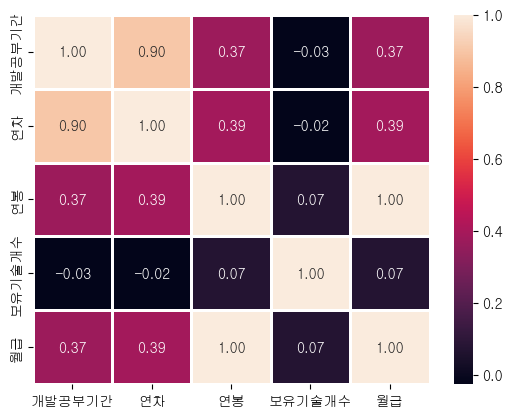

In [38]:
# 상관계수 시각화
# annot : 수치를 표기할지 말지
# fmt : 포메팅 형식
# lw(linewidth) : 격자 선 두께
sns.heatmap(data.corr(numeric_only = True), annot = True, fmt = '.2f', lw = 1)

### 급여, 보유기술개수 데이터 분석 결과
> 분석 결과
> - 보유기술개수와 월급 데이터 간의 데이터 분포를 산점도 나타냈을 때 뚜렷한 선형관계가 있어 보이지 않음
> - 상관계수 확인 결과 0.07로 상관관계가 있다고 말할 수 없음
> - 즉, 단순하게 보유기술개수만 늘리는 것은 연봉 상승에 큰 도움이 되지 않을 것.

> 추가 행동
> - 연봉 상승에 의미가 있는 특정 스킬

In [39]:
# 개발자 스킬 데이터 불러오기
# read_csv 함수 활용해서 Developer Skills.csv 파일 불러오기
# encoding = 'euc-kr'
# 일련번호 컬럼 index로 설정
# skills 변수 저장 후 출력
skills = pd.read_csv("./data/Developer Skills.csv", index_col = "일련번호", encoding = "euc-kr")
skills

,보유기술
일련번호,
DEV1,C;C++;Java;Perl;Ruby;Git;Ruby on Rails
DEV2,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...
DEV3,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...
DEV4,Python;Git;PostgreSQL
DEV5,C;C++;Java;Python;Git
...,...
DEV33462,C;C#;C++;Microsoft Azure;SQLite
DEV33463,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...
DEV33464,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...


In [40]:
# 데이터 확인
skills.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33466 entries, DEV1 to DEV33466
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   보유기술    33438 non-null  object
dtypes: object(1)
memory usage: 522.9+ KB


In [41]:
# 데이터 샘플링 후 확인
skills.head()

,보유기술
일련번호,
DEV1,C;C++;Java;Perl;Ruby;Git;Ruby on Rails
DEV2,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...
DEV3,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...
DEV4,Python;Git;PostgreSQL
DEV5,C;C++;Java;Python;Git


In [42]:
# 보유기술 내용이 여러 기술을 ;으로 연결해놨음
# 각 기술별로 데이터 분석을 해보기 위해 보유기술 분할

# str → Series의 문자열 데이터를 일괄적으오 처리할 수 있도록 만들어주는 기능
# split → 문자열 데이터를 특정 기준으로 분할해주는 함수
skill_data = skills['보유기술'].str.split(';')
skill_data

일련번호
DEV1           [C, C++, Java, Perl, Ruby, Git, Ruby on Rails]
DEV2        [Bash/Shell, HTML/CSS, JavaScript, PHP, Ruby, ...
DEV3        [C++, HTML/CSS, Java, JavaScript, Kotlin, Node...
DEV4                                [Python, Git, PostgreSQL]
DEV5                              [C, C++, Java, Python, Git]
                                  ...                        
DEV33462                [C, C#, C++, Microsoft Azure, SQLite]
DEV33463    [C#, HTML/CSS, JavaScript, TypeScript, Docker,...
DEV33464    [C#, HTML/CSS, Java, JavaScript, npm, ASP.NET ...
DEV33465    [C#, HTML/CSS, JavaScript, SQL, TypeScript, np...
DEV33466                                     [Python, Docker]
Name: 보유기술, Length: 33466, dtype: object

In [43]:
# 각 행별로 list가 들어있음
# list 요소들을 행으로 확장

explode_skill = skill_data.explode()
# explode → 리스트 형태의 데이터를 다수의 행으로 전개하는 기능을 제공
# 리스트 안의 요소 개수만큼 행으로 증식
explode_skill

일련번호
DEV1                           C
DEV1                         C++
DEV1                        Java
DEV1                        Perl
DEV1                        Ruby
                    ...         
DEV33465                DynamoDB
DEV33465    Microsoft SQL Server
DEV33465                  SQLite
DEV33466                  Python
DEV33466                  Docker
Name: 보유기술, Length: 442784, dtype: object

In [44]:
explode_skill.shape

(442784,)

In [45]:
# 결측치가 있는지 확인
explode_skill.isnull().sum()
# 28개의 결측치가 존재
# 개발자 연봉데이터와 병합 후, 어떤 데이터가 결측치인지 확인 필요

np.int64(28)

### 데이터 병합
> 개발 스킬별 연봉데이터를 보기 위해 merge 함수 활용해 스킬-연봉데이터 병합
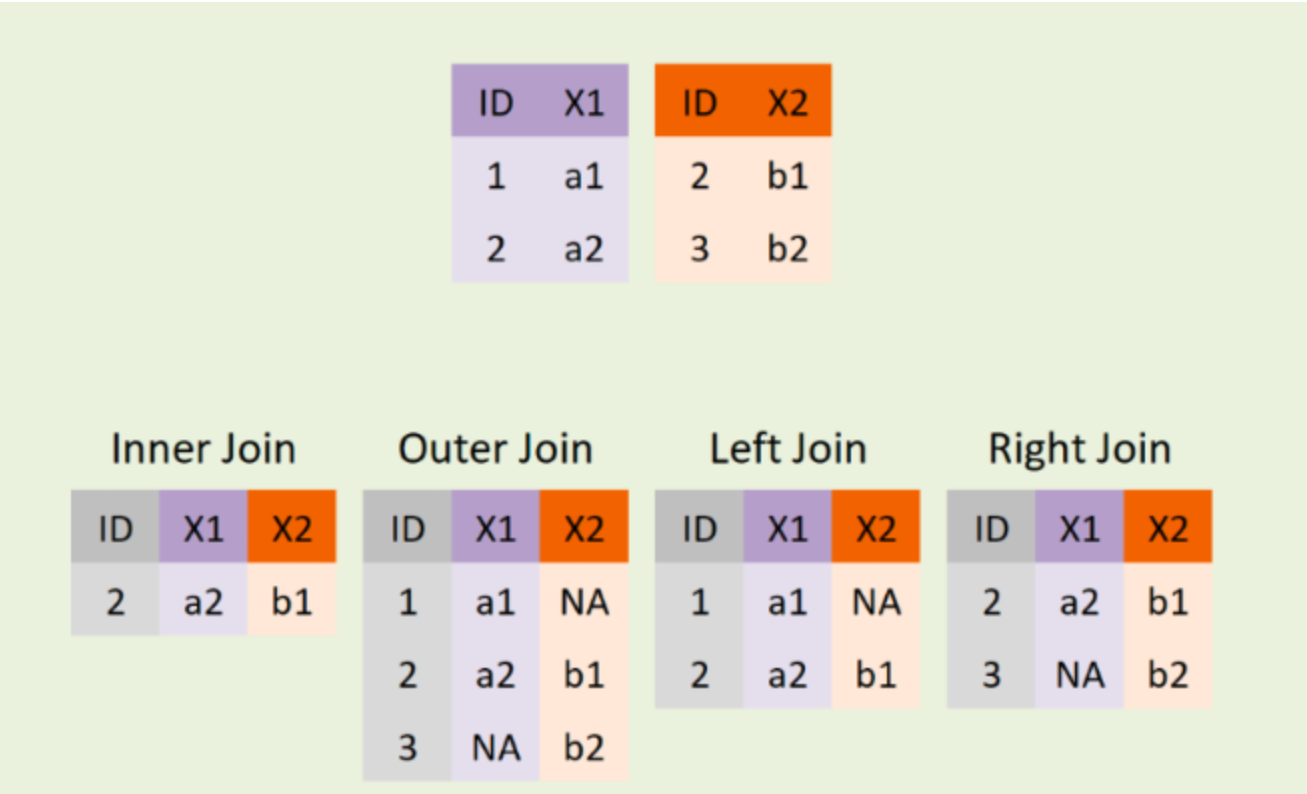

In [46]:
# 병합을 하기 전
# 개발자 연봉 데이터 인덱스, 기술 데이터 인덱스가 일치하는지 확인
np.sum(skills.index != data.index)
# 0이 나왔다는 것은 모든 인덱스가 일치하고 있다는 뜻.

np.int64(0)

In [47]:
# inner으로 데이터 병합
full_data = pd.merge(explode_skill, data, how = 'inner', on = '일련번호')
full_data

,보유기술,나이,학력,성별,정신건강,전문직,개발공부기간,연차,국적,연봉,보유기술개수,월급
일련번호,,,,,,,,,,,,
DEV1,C,<35,Master,Man,No,Dev,15,6,Germany,107409913,7.0,8950826
DEV1,C++,<35,Master,Man,No,Dev,15,6,Germany,107409913,7.0,8950826
DEV1,Java,<35,Master,Man,No,Dev,15,6,Germany,107409913,7.0,8950826
DEV1,Perl,<35,Master,Man,No,Dev,15,6,Germany,107409913,7.0,8950826
DEV1,Ruby,<35,Master,Man,No,Dev,15,6,Germany,107409913,7.0,8950826
...,...,...,...,...,...,...,...,...,...,...,...,...
DEV33465,DynamoDB,<35,Undergraduate,Man,Yes,Dev,5,1,United States of America,97279000,15.0,8106583
DEV33465,Microsoft SQL Server,<35,Undergraduate,Man,Yes,Dev,5,1,United States of America,97279000,15.0,8106583
DEV33465,SQLite,<35,Undergraduate,Man,Yes,Dev,5,1,United States of America,97279000,15.0,8106583


In [48]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442784 entries, DEV1 to DEV33466
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   보유기술    442756 non-null  object 
 1   나이      442784 non-null  object 
 2   학력      442784 non-null  object 
 3   성별      442784 non-null  object 
 4   정신건강    442784 non-null  object 
 5   전문직     442784 non-null  object 
 6   개발공부기간  442784 non-null  int64  
 7   연차      442784 non-null  int64  
 8   국적      442784 non-null  object 
 9   연봉      442784 non-null  int64  
 10  보유기술개수  442784 non-null  float64
 11  월급      442784 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 43.9+ MB


In [49]:
print(full_data['보유기술'].isnull().sum())

full_data[full_data['보유기술'].isnull()]
# 결측치가 발생한 이유 : 보유기술을 따로 기입하지 않아서 결측치 발생한 것 같음
# 1. 대체
# '없음'
full_data['보유기술'] = full_data['보유기술'].fillna('없음')
print(full_data['보유기술'].isnull().sum())

28
0


In [50]:
full_data.loc[full_data['보유기술'] == '없음', '보유기술'] = np.nan
print(full_data['보유기술'].isnull().sum())

28


In [51]:
# 2. 삭제
idx = full_data[full_data['보유기술'].isnull()].index
full_data.drop(index = idx, inplace = True)
print(full_data['보유기술'].isnull().sum())

0


In [52]:
print(full_data['보유기술'].unique())
print(len(full_data['보유기술'].unique()))
# 보유기술 컬럼 안에 유니크값 조회 → 개발자들이 어떤 기술을 가지고 있는지 확인
# 'C' 'C++' 'Java' 'HTML/CSS' 'JavaScript' 등 116개의 기술이 존재

['C' 'C++' 'Java' 'Perl' 'Ruby' 'Git' 'Ruby on Rails' 'Bash/Shell'
 'HTML/CSS' 'JavaScript' 'PHP' 'SQL' 'jQuery' 'Laravel' 'AWS' 'MySQL'
 'PostgreSQL' 'Kotlin' 'Node.js' 'TypeScript' 'Docker' 'Kubernetes'
 'Angular' 'Express' 'Spring' 'Heroku' 'DynamoDB' 'Python' 'Assembly'
 'Rust' 'Ansible' 'Terraform' 'Yarn' 'React.js' 'SQLite' 'C#' 'VBA'
 'ASP.NET' 'Microsoft SQL Server' 'Gatsby' 'R' 'Flask' 'ASP.NET Core '
 'Microsoft Azure' 'Elasticsearch' 'Julia' 'Matlab'
 'Google Cloud Platform' 'Clojure' 'Go' 'Angular.js' 'MariaDB' 'MongoDB'
 'Dart' 'PowerShell' 'Xamarin' 'Couchbase' 'Redis' 'Vue.js' 'Chef'
 'Unity 3D' 'Django' 'F#' 'Scala' 'Unreal Engine' 'FastAPI' 'Firebase'
 'DigitalOcean' 'Objective-C' 'Swift' 'Symfony' 'IBM Cloud or Watson'
 'Oracle' 'Groovy' 'IBM DB2' 'Puppet' 'Cassandra' 'LISP' 'Delphi' 'APL'
 'Erlang' 'Elixir' 'Deno' 'Svelte' 'Haskell' 'Crystal' 'Flow'
 'Oracle Cloud Infrastructure' 'Drupal' 'Pulumi' 'COBOL' 'npm' 'Homebrew'
 'CouchDB' 'Neo4j' 'Google Cloud' 'VMware' 'O

In [58]:
# 한국 개발자에 한해서 보유기술별로 평균 월급 계산
# indexing
# 1. groupby
# 2. pivot table

# 필요한 컬럼만 인덱싱 해오기
target_df = full_data[['국적', '보유기술', '월급']]

# groupby로 국적, 보유기술별 평균 월급 계산
target_df.groupby(by = ['국적', '보유기술']).mean().astype(int)

pivot_target = pd.pivot_table(target_df, index = ['국적', '보유기술'], values = '월급', aggfunc = 'median')

In [62]:
korea_target = pivot_target.loc['South Korea']
korea_target
# 보유기술 기준 알파벳 순서로 정렬
#월급이 높은 기술을 보고 싶음 → 월급 기준으로 내림차순 정렬
korea_target.sort_values(by = '월급', ascending = False).head(10) # 오름차순 기본

,월급
보유기술,
Couchbase,16500139.0
Clojure,14563708.0
Puppet,10999475.0
Cassandra,10450138.0
Linode,10083431.0
Terraform,9625119.5
Go,9166808.0
Gatsby,9166808.0
Neo4j,9166808.0


In [90]:
# 연차가 5년 미만인 개발자 골라와서 다시 해보기

# 1. full_data에서 연차가 5년 미만인 주니어 개발자만 가져오기
junior_df = full_data[full_data['연차'] > 5]

# 2. 국적, 보유기술, 월급 인덱싱 해오기
junior_target = junior_df[['국적', '보유기술', '월급']]

# 3. 국적, 보유기술별로 평균 월급 계산 → mean
junior_target.groupby(by = ['국적', '보유기술']).mean().astype(int)

# 4. 한국 개발자 것만 가져오기
# 5. 상위 15개 기술 출력
junior_graph = junior_target.loc[junior_target['국적'] == 'South Korea', ['보유기술', '월급']].groupby(by = '보유기술').mean().astype(int).sort_values(by = '월급').tail(15)

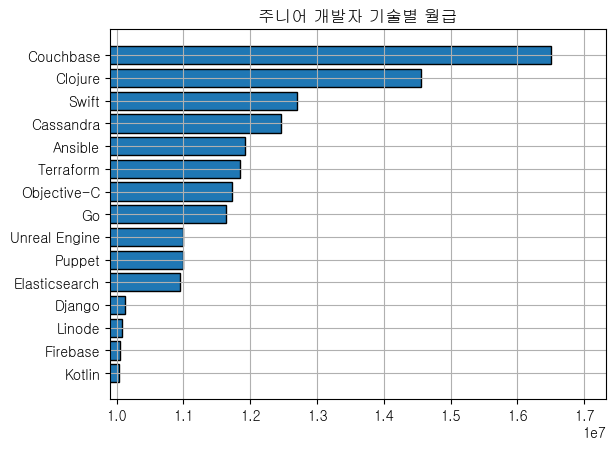

In [98]:
plt.barh(y = junior_graph.index, width = junior_graph['월급'], edgecolor = 'black')
plt.xlim(9900000,)
plt.title('주니어 개발자 기술별 월급')
plt.grid()
plt.show()

### 기술별 평균 월급 분석 결과(+ 한국 개발자)
> 특정 도메인에서 많이 사용되는 기술(Matlab, APL, Haskell) 연봉이 높게 형성돼있음
> Google Cloud Platform, Kubernetes, Cloud Firestore 클라우드 관련 기술이 다소 많이 올라와있음

- 특정 도메인과 컴퓨터 기술을 같이 활용할 수 있는 방안을 생각해봐야겠다
- 인공지능의 발전과 더불어서 클라우드 기술군의 수요가 많아지고 있다

### 인사이트 도출
1. 학력에 다른 연봉 차이
   > - 고졸 개발자는 평균 연봉이 낮음
   > - 하지만 학사 이상의 학력의 개발자는 연봉차이가 크지 않음
   > - 학사 이상의 학력이라면 학위보다는 실무 역량이 더 큰 영향을 미칠 것
   > - 그러나 고졸은 최소 학사 취득을 통해 평균 연봉을 크게 올릴 수 있을 것
2. 보유기술 수에 따른 연봉차이
   > - 보유 기술 개수와 연봉의 상관관계는 매우 약함(0.07)
   > - 단순히 많이 아는 것보다는 핵심 기술을 정밀하게 다루는 것이 중요
   > - 즉, 기술의 깊이와 실용성이 더 큰 변수
3. 기술별 연봉 차이
   > - Matlab, APL, Google Cloud Platfor 등 연봉이 높은 기술군에 속함
   > - 데이터 분석, 인공지능, 클라우드 서비스 연관 기술이 연봉이 높은 편
   > - 도메인 지식 + 컴퓨터 기술을 함께 발전시키면 경쟁력이 있는 개발자로 성장 가능

### 페르소나 정의
- 내 서비스를 이용할 가상의 인물
- 구체적으로 서비스를 설계할 수 있음

## 🧍‍♂️ 페르소나 정의: 박인재
1. 박인재는  
2. 29세의 비전공자로, 최근 부트캠프를 수료한 후 프론트엔드 개발자로 첫 커리어를 시작한 신입 개발자이다.  
3. 고졸 학력으로 입사하여 빠르게 실무에 적응하고 있으나, 연봉 수준이 기대에 미치지 못해 향후 커리어에 대한 불안감을 느끼고 있다.

4. 그는 단순한 기술 학습보다 연봉을 실질적으로 향상시킬 수 있는 경력 전략에 관심이 많으며,  
5. 자기주도 학습에 적극적이고 데이터 기반으로 의사결정을 내리는 성향을 지녔다.  

6. 현재 박인재의 목표는 연봉을 약 1.5배 이상 높이는 것이며,  
7. 이를 위해 데이터 분석, 클라우드 인프라, API 활용 등의 실무 기술을 강화하고  
8. 이직 혹은 사내 전환을 통해 성장 기회를 확보하고자 한다.


#### 실습 참고용
> 페르소나 작성 후 이미지 생성
> google whisk : https://labs.google/fx/ko/tools/whisk

#### 페르소나 작성 템플릿 - 아래 복사해서 제공

### 1. 기본 정보
- **이름**: *(가명 가능)*  
- **나이**:   
- **성별**: *(선택)*  

---

### 2. 배경 및 상황
- **전공 여부**: *(전공 / 비전공)*  
- **학력 수준**: *(고졸 / 학사 / 석사 / 기타)*  
- **현재 상태**: *(예: 부트캠프 수강 중 / 수료 후 신입 개발자 / 이직 준비 중 등)*  

---

### 3. 현재 역할 또는 학습 영역
- **집중 중인 기술 분야**: *(예: 프론트엔드, 백엔드, 데이터, AI 등)*  
- **실습 중 흥미를 느낀 기술**: *(선택적으로 작성)*  

---

### 4. 문제 인식 및 고민
- **현재 느끼는 커리어 관련 고민**:  
  *(예: 연봉이 낮다, 내가 어떤 기술을 더 배워야 할지 모르겠다, 회사 내 성장이 어렵다 등)*  

- **기존에 겪은 불만족스러운 경험**:  
  *(예: 직무 미스매치, 기술 격차, 기대 연봉과의 차이 등)*  

---

### 5. 동기와 니즈
- **왜 분석을 하게 되었는가?**  
  *(이 분석이 본인에게 왜 필요한가)*  

- **현재 가장 알고 싶은 것 또는 해결하고 싶은 질문**  
  *(예: 어떤 기술이 연봉에 유리한가? 나와 유사한 사람은 어떤 경로로 성장했는가? 등)*  

---

### 6. 성향 및 학습 스타일
- **학습 스타일**: *(자기주도 학습 / 실습 중심 / 피드백 중심 등)*  
- **의사결정 방식**: *(데이터 기반 / 직관 기반 / 경험 기반 등)*  

---

### 7. 목표
- **단기 목표 (3~6개월)**:  
  *(예: 포트폴리오 완성, 실무 기술 학습, 프로젝트 참여 등)*  

- **장기 목표 (1~2년)**:  
  *(예: 연봉 1.5배 성장, 이직 성공, 특정 분야 전문가 등)*  

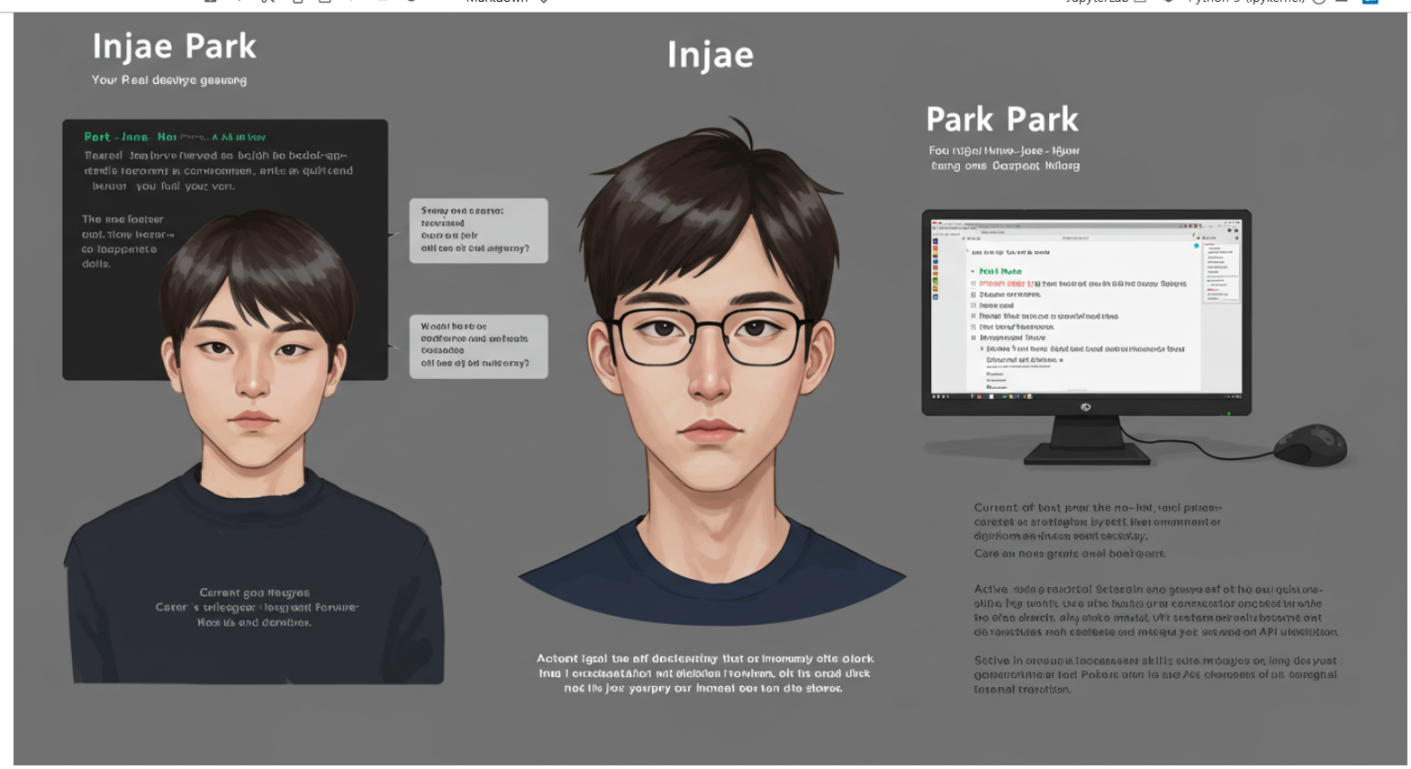

## 🧭 고객 여정 맵 (Customer Journey Map) - 수업시수에 맞게 조절

### 📌 정의  
고객 여정 맵은 **고객이 문제를 인식하고 해결에 이르기까지의 전체 경험 흐름**을 시각화한 도구입니다.  
개인의 생각, 행동, 감정, 불편사항 등을 **시간 순서 또는 경험 단계별**로 정리하여  
사용자의 현실적인 문제 상황과 니즈를 구체적으로 이해하고,  
이에 맞는 솔루션을 설계하기 위해 활용됩니다.

---

### 🧱 기본 구성 요소

| 요소 | 설명 |
|------|------|
| **유저 생각** | 사용자가 각 단계에서 무슨 생각을 하는지 (내면의 독백, 의문, 기대 등) |
| **유저 행동** | 사용자가 실제로 어떤 행동을 취하는지 (검색, 탐색, 실행 등) |
| **기분** | 각 단계에서 사용자의 감정 상태 (불안, 기대, 좌절, 자신감 등) |
| **불편 사항** | 사용자가 경험하는 문제점이나 장애물 (정보 부족, 실행 어려움 등) |

---

### 🕰️ 단계 예시 (시간 흐름 기반)

1. **문제 인식** – 사용자 스스로 문제나 불편을 느끼는 시점  
2. **탐색/조사** – 해결 방안을 찾기 위한 정보 탐색 단계  
3. **해결 전략 설정** – 기준을 정하고 방향을 잡는 단계  
4. **실행** – 실제 행동에 나서는 단계  
5. **후속 경험** – 문제 해결 후 느끼는 감정 또는 지속적 행동

---

### 🎯 활용 목적

- **사용자 중심의 서비스 설계**  
  사용자 경험을 세분화해 문제 지점을 파악하고, 서비스 개선 또는 신규 서비스 기획에 활용

- **페르소나 연계 기획**  
  가상의 사용자(페르소나)의 행동과 감정 흐름을 구체화하여 **현실적인 솔루션 설계** 가능

- **팀 커뮤니케이션 도구**  
  기획자, 디자이너, 개발자 간의 사용자 이해를 공유하는 공통 언어로 활용

---

### 🎯 고객 여정 기반 기능 도출 기준 (3요소 프레임워크)

각 고객 여정 단계에서 기능을 도출할 때 아래 3가지 기준을 함께 고려합니다.

---

#### ✅ ① Pain Point(불편사항) 기반 기능
- 명확하게 표현된 불편사항을 해소
- 예: 정보 부족, 판단 어려움, 피드백 부재

#### ✅ ② Emotion Shift(감정변화) 기반 기능
- 부정적인 감정은 완화하고, 긍정적인 감정은 강화
- 감정 흐름에 맞춘 감정 반등 또는 유지 설계

#### ✅ ③ 행동 유도 기반 기능
- 현재 단계에서 자연스럽게 다음 단계로 넘어갈 수 있도록 설계
- 행동 → 다음 목표 → 동기 부여 유도

---

### 🧩 단계별 기능 도출 예시

| 시점 | Pain Point | 감정 흐름 | 제안 기능 |
|------|-------------|------------|-------------|
| **취업 직후** | 연봉이 너무 낮다는 점에서 실망감 | 😄 매우 긍정 → 😣 매우 부정 | - 입사 초기 연봉 진단/예측 기능<br>- 다른 개발자의 성장 로드맵 비교 기능 |
| **연봉 불만** | 기준이 없어 판단이 어려움 | 😣 매우 부정 | - 기술 수준 진단 → 연봉 기대치 제안<br>- 실연봉 커뮤니티 공유 기능 |
| **정보 탐색** | 정보가 흩어져 있고 객관적이지 않음 | 😟 부정 → 😐 중립 | - 기술 트렌드 자동 큐레이션<br>- 실무 사례 기반 추천 알고리즘 |
| **데이터 분석** | 학습 방향은 생겼지만 시간/자원 부족 | 😐 중립 | - 학습 목표 자동 분할 & 리마인더<br>- 개인화된 학습 스케줄 제안 |
| **실행 전략 수립** | 피드백 체계 부재, 멘토 부족 | 🙂 긍정 유지 or 불안정 | - 실무자 피드백/코칭 매칭 기능<br>- 포트폴리오 자동 진단 + 리뷰 시스템 |

---

### 📌 기능 도출 예시 서식

```
문제: 정보가 흩어져 있고 객관적이지 않음  
감정: 불안함, 기분 저하  
기능 제안:
- 🔹 정보 출처별 신뢰도 점수 표시
- 🔹 관심 기술 기반 큐레이션 기능
- 🔹 상위 5% 개발자의 성장 경로 비교
```


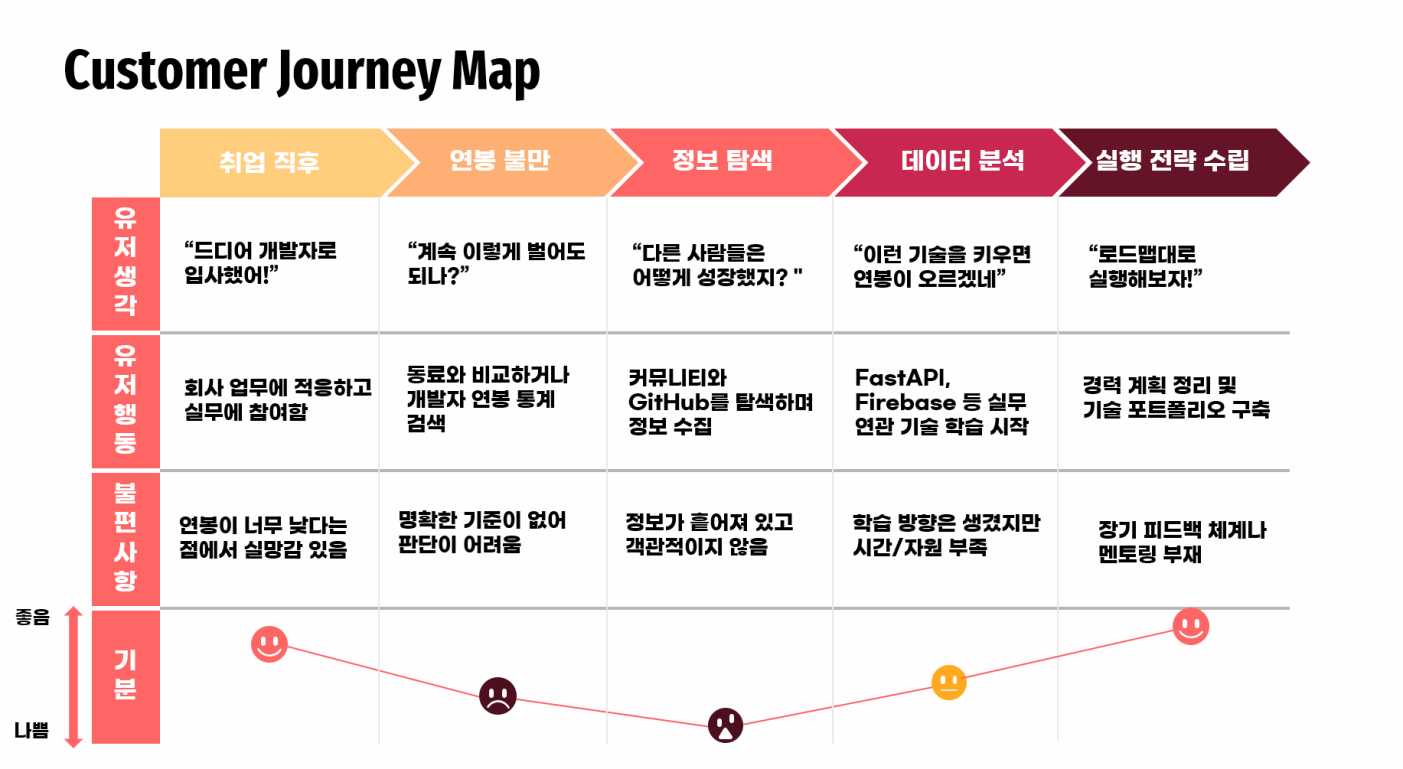